In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
from google.colab import files

uploaded = files.upload()

Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set.csv


In [4]:
data = pd.read_csv("2) Stock Prices Data Set.csv")
data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [7]:
# Select numerical features
features = data.select_dtypes(include=['float64', 'int64'])

# Handle missing values by dropping rows with NaNs
features = features.dropna()

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

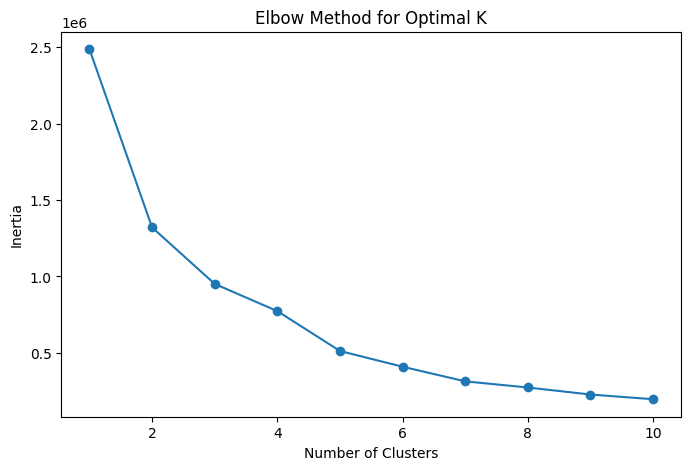

In [8]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Create a Series from clusters with the index of the `features` DataFrame
cluster_series = pd.Series(clusters, index=features.index)

# Assign the cluster labels to the original data DataFrame, aligning by index
data['Cluster'] = cluster_series

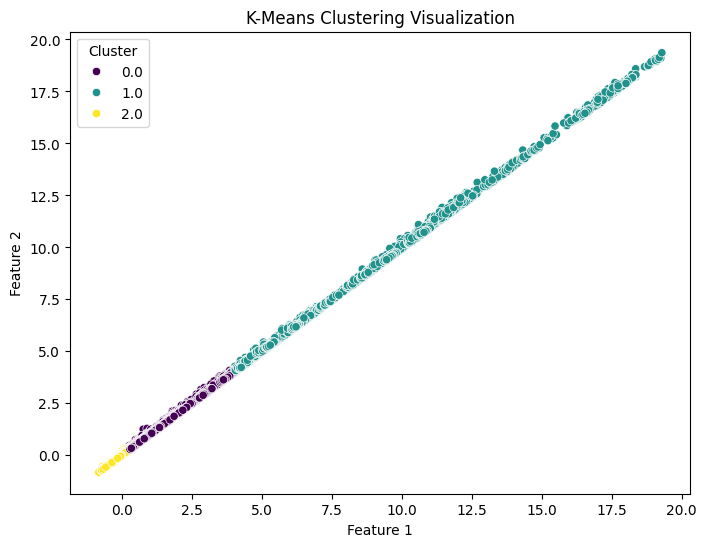

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=data.loc[features.index, 'Cluster'],
    palette='viridis'
)
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()